In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import warnings
import random as ran

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore') 

from src import crs, PublicPredictor, KMeans, TimeDivisionKMeans
from src.dbc import utils
import src.utils as ut
from IPython.display import clear_output

In [3]:
# 1. load_excel
data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
p, m = crs.utils.data_preprocessing(xlsx)

m.set_index("month", inplace=True)

# 3. data init
_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

PUBLIC_PERCENTAGE = 30
APT = crs.utils.get_APT(month_df, PUBLIC_PERCENTAGE)

calc = crs.models.ManagementOffice(
        month=_month,
        households=month_df,
        APT=APT,
        contract="단일계약"
    )
apt = calc.apart

In [4]:
m_15 = utils.data_preprocessing(xlsx)

df = utils.dimension_reduction(m_15)
m_60 = df.copy()

m_60.head()

m_60_1 = m_60[m_60.index.month == 1].copy()
m_60_1.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2019-01-01 00:00:00,0.033,0.000,0.034,0.037,0.062,0.322,0.240,0.295,0.373,0.243,...,0.534,0.188,0.400,0.318,0.420,0.626,0.484,0.289,0.305,0.652
2019-01-01 01:00:00,0.048,0.000,0.033,0.037,0.063,0.185,0.257,0.397,0.257,0.228,...,0.396,0.434,0.355,0.250,0.465,0.409,0.459,0.336,0.332,0.557
2019-01-01 02:00:00,0.032,0.000,0.039,0.036,0.062,0.175,0.384,0.353,0.123,0.141,...,0.194,0.337,0.379,0.274,0.326,0.307,0.405,0.382,0.311,0.491
2019-01-01 03:00:00,0.033,0.000,0.039,0.037,0.062,0.167,0.276,0.488,0.142,0.159,...,0.286,0.263,0.375,0.264,0.336,0.345,0.298,0.291,0.261,0.511
2019-01-01 04:00:00,0.032,0.001,0.033,0.037,0.063,0.197,0.266,0.278,0.190,0.227,...,0.275,0.245,0.310,0.423,0.360,0.364,0.212,0.347,0.294,0.507


In [345]:
kmeans = KMeans(datas=m_60_1.T.values)
kmeans.fit()
kmeans.sorting()

ECV : 47 %


In [346]:
kmeans_group_df = ut.make_group_df(m_60_1, kmeans)
kmeans_anomaly_df = ut.get_anomaly_df(kmeans_group_df)

kmeans_group_df = ut.adjust_anomaly_df(m_60_1, kmeans_anomaly_df, kmeans_group_df)
kmeans_group_df

,가구명,usage (kWh),label
0,아파트1-104-1206,99,0
1,아파트1-104-303,10,0
2,아파트1-104-1307,23,0
3,아파트1-104-1208,40,0
4,아파트1-104-408,39,0
...,...,...,...
103,아파트1-103-903,273,0
104,아파트1-103-1106,255,0
105,아파트1-103-705,228,0
106,아파트1-103-1505,384,2


In [347]:
ut.get_anomaly_df(kmeans_group_df)

""


In [250]:
tdkmeans = TimeDivisionKMeans(datas=m_60_1)
tdkmeans.fit()

1/248 - ECV:85%
11/248 - ECV:79%
21/248 - ECV:86%
31/248 - ECV:88%
41/248 - ECV:85%
51/248 - ECV:81%
61/248 - ECV:84%
71/248 - ECV:86%
81/248 - ECV:87%
91/248 - ECV:83%
101/248 - ECV:85%
111/248 - ECV:79%
121/248 - ECV:88%
131/248 - ECV:79%
141/248 - ECV:85%
151/248 - ECV:83%
161/248 - ECV:87%
171/248 - ECV:79%
181/248 - ECV:82%
191/248 - ECV:81%
201/248 - ECV:89%
211/248 - ECV:77%
221/248 - ECV:83%
231/248 - ECV:79%
241/248 - ECV:87%
248/248 - ECV:84%


In [251]:
tdkmeans_group_df = ut.make_group_df(m_60_1, tdkmeans, _type="tdKMeans")
tdkmeans_anomaly_df = ut.get_anomaly_df(tdkmeans_group_df)

tdkmeans_group_df = ut.adjust_anomaly_df(m_60_1, tdkmeans_anomaly_df, tdkmeans_group_df)
tdkmeans_group_df

,가구명,usage (kWh),label
0,아파트1-104-1206,99,0
1,아파트1-104-303,10,0
2,아파트1-104-1307,23,0
3,아파트1-104-1208,40,0
4,아파트1-104-408,39,0
...,...,...,...
103,아파트1-103-903,273,1
104,아파트1-103-1106,255,1
105,아파트1-103-705,228,1
106,아파트1-103-1505,384,2


In [252]:
ut.get_anomaly_df(tdkmeans_group_df)

""


## ECV CHECK

### 일반 KMeans

#### Zero Label 제거

In [348]:
unique_labels = np.unique(kmeans_group_df['label'])

og_labels = kmeans_group_df['label'].values
new_labels = np.zeros(kmeans_group_df['label'].size) - 1

for idx, label in enumerate(unique_labels):
    new_labels[og_labels == label] = idx
    
new_labels = new_labels.astype("int")
new_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 5, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 3, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1])

0.45195210031549726


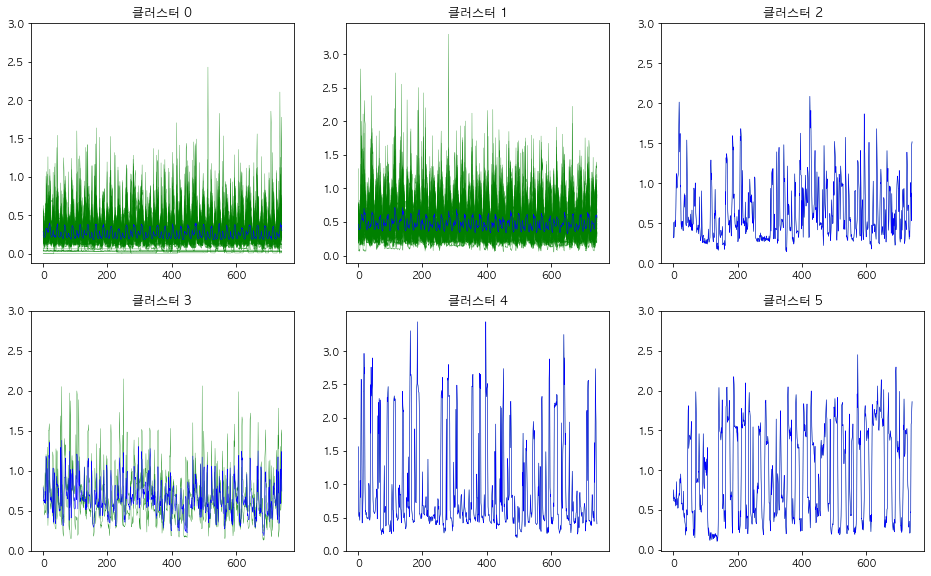

In [350]:
kmeans.K = len(unique_labels)
kmeans.clusters_ = kmeans.clusters_[:kmeans.K]
kmeans.labels_ = new_labels
kmeans.next_setting()

print(kmeans.ecv)
kmeans.draw_plot()

### TimeDivisionKMeans

#### 최종 클러스터 패턴 선정

##### 방법 1. 평균값

0.42679460952709236


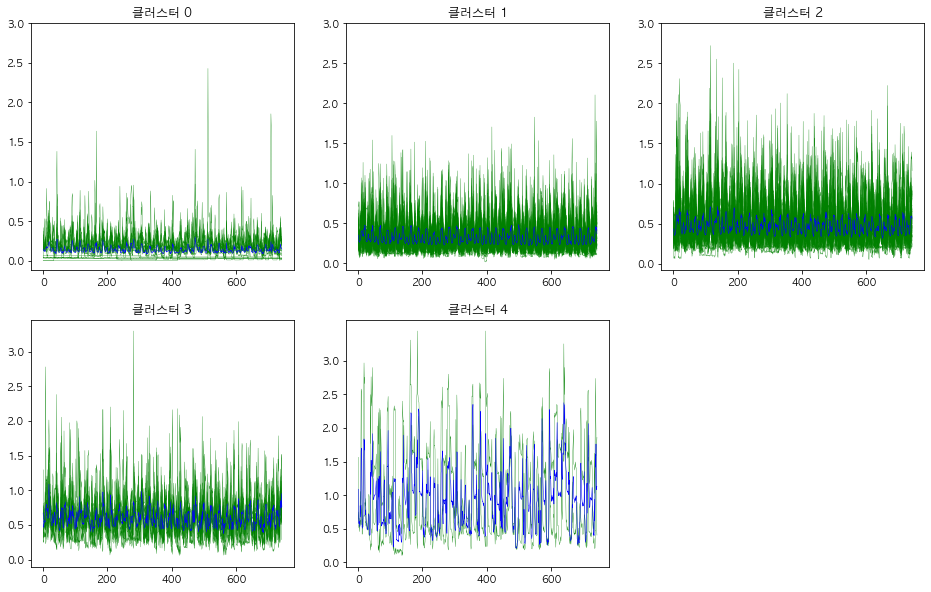

In [255]:
unique_groups = np.unique(tdkmeans_group_df['label'])
clusters_ = np.array([])

for group in unique_groups:
    sel_group_df = tdkmeans_group_df[
        tdkmeans_group_df['label'] == group
    ]
    _cluster = tdkmeans.df[sel_group_df['가구명'].values].mean(axis=1).values
    
    clusters_ = np.append(clusters_, _cluster)
    clusters_ = clusters_.reshape(-1,len(_cluster))
    
_kmeans_1 = KMeans(datas=tdkmeans.df.T.values, K=len(unique_groups))
_kmeans_1.init_setting()
_kmeans_1.clusters_ = clusters_
_kmeans_1.labels_ = tdkmeans_group_df['label'].values

print(_kmeans_1.ecv)
_kmeans_1.draw_plot()

##### 방법 2. 라운드 최빈 클러스터 패턴

0.2309016860158244


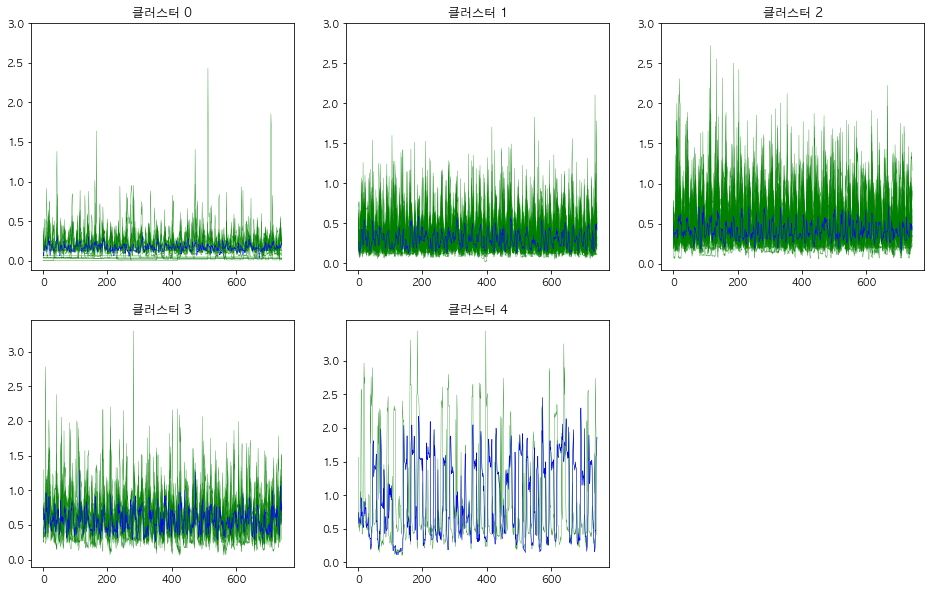

In [263]:
unique_groups = np.unique(tdkmeans_group_df['label'])
clusters_ = np.array([])

for group in unique_groups:
    sel_group_df = tdkmeans_group_df[
        tdkmeans_group_df['label'] == group
    ]
    sel_cluster_info = tdkmeans.cluster_info[
        sel_group_df['가구명']
    ]

    pat_idxes = sel_cluster_info.apply(lambda x: x.value_counts().idxmax(), axis=1).values
    _cluster = np.array([])

    for _round,pat_idx in enumerate(pat_idxes):
        _kmeans = tdkmeans.kmeans_[_round]
        _cluster = np.append(
            _cluster,
            _kmeans.clusters_[pat_idx]
        )

    clusters_ = np.append(clusters_, _cluster)
    clusters_ = clusters_.reshape(-1,len(_cluster))
    
_kmeans_2 = KMeans(datas=tdkmeans.df.T.values, K=len(unique_groups))
_kmeans_2.init_setting()
_kmeans_2.clusters_ = clusters_
_kmeans_2.labels_ = tdkmeans_group_df['label'].values

print(_kmeans_2.ecv)
_kmeans_2.draw_plot()

##### 방법 3. 속해있었던 클러스터 패턴들 평균

0.4127900251174369


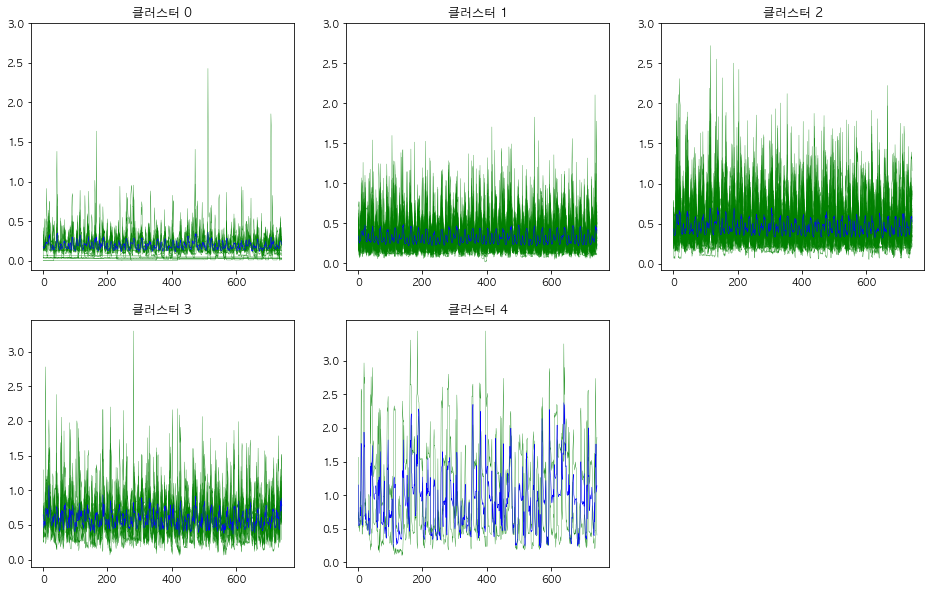

In [387]:
unique_groups = np.unique(tdkmeans_group_df['label'])
clusters_ = np.array([])

for group in unique_groups:
    sel_group_df = tdkmeans_group_df[
        tdkmeans_group_df['label'] == group
    ]
    sel_cluster_info = tdkmeans.cluster_info[
        sel_group_df['가구명']
    ]
    
    pat_idxes = sel_cluster_info.values
    _cluster = np.array([])

    for _round,pat_idx in enumerate(pat_idxes):
        _kmeans = tdkmeans.kmeans_[_round]
        _clusters = _kmeans.clusters_

        _cluster = np.append(
            _cluster,
            np.array([_clusters[idx].tolist() for idx in pat_idx]).mean(axis=0)
        )
        
    clusters_ = np.append(clusters_, _cluster)
    clusters_ = clusters_.reshape(-1,len(_cluster))
    
_kmeans_3 = KMeans(datas=tdkmeans.df.T.values, K=len(unique_groups))
_kmeans_3.init_setting()
_kmeans_3.clusters_ = clusters_
_kmeans_3.labels_ = tdkmeans_group_df['label'].values

print(_kmeans_3.ecv)
_kmeans_3.draw_plot()

In [372]:
sel_group_df = tdkmeans_group_df[
    tdkmeans_group_df['label'] == group
]
sel_cluster_info = tdkmeans.cluster_info[
    sel_group_df['가구명']
]

sel_cluster_info



array([[0.1063    , 0.0717    , 0.0607    ],
       [0.26004762, 0.26447619, 0.26107143],
       [0.4661875 , 0.3938125 , 0.3219375 ],
       [0.426     , 0.5549    , 0.5439    ],
       [0.73991667, 0.66691667, 0.57533333],
       [1.564     , 0.592     , 0.515     ],
       [1.295     , 1.048     , 0.626     ]])

In [265]:
m_60_1[0:10]

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2019-01-01 00:00:00,0.033,0.000,0.034,0.037,0.062,0.322,0.240,0.295,0.373,0.243,...,0.534,0.188,0.400,0.318,0.420,0.626,0.484,0.289,0.305,0.652
2019-01-01 01:00:00,0.048,0.000,0.033,0.037,0.063,0.185,0.257,0.397,0.257,0.228,...,0.396,0.434,0.355,0.250,0.465,0.409,0.459,0.336,0.332,0.557
2019-01-01 02:00:00,0.032,0.000,0.039,0.036,0.062,0.175,0.384,0.353,0.123,0.141,...,0.194,0.337,0.379,0.274,0.326,0.307,0.405,0.382,0.311,0.491
2019-01-01 03:00:00,0.033,0.000,0.039,0.037,0.062,0.167,0.276,0.488,0.142,0.159,...,0.286,0.263,0.375,0.264,0.336,0.345,0.298,0.291,0.261,0.511
2019-01-01 04:00:00,0.032,0.001,0.033,0.037,0.063,0.197,0.266,0.278,0.190,0.227,...,0.275,0.245,0.310,0.423,0.360,0.364,0.212,0.347,0.294,0.507
2019-01-01 05:00:00,0.040,0.000,0.033,0.037,0.062,0.156,0.315,0.300,0.150,0.169,...,0.237,0.270,0.351,0.318,0.394,0.220,0.213,0.296,0.285,0.530
2019-01-01 06:00:00,0.041,0.000,0.033,0.036,0.062,0.170,0.196,0.266,0.170,0.168,...,0.330,0.236,0.636,0.310,0.322,0.217,0.424,0.377,0.436,0.483
2019-01-01 07:00:00,0.033,0.000,0.033,0.037,0.063,0.248,0.177,0.237,0.271,0.185,...,0.451,0.254,0.519,0.403,0.331,0.343,0.518,0.222,0.444,0.567
2019-01-01 08:00:00,0.032,0.000,0.033,0.037,0.062,0.223,0.165,0.212,0.154,0.223,...,0.351,0.446,0.354,0.235,0.444,0.454,0.485,0.344,0.709,0.630
2019-01-01 09:00:00,0.033,0.000,0.032,0.037,0.062,0.337,0.163,0.233,0.274,0.373,...,0.679,0.932,1.149,0.196,0.610,0.532,0.593,0.355,0.500,0.644


### 시간대별 ECV 체크

In [424]:
_round = 6

In [429]:
chk = np.array([])

datas = m_60_1.T.values.copy()
datas = datas.reshape(-1,round(len(datas[0]) / 3),3)
cluster_datas = kmeans.clusters_.reshape(-1,round(kmeans.clusters_[0].size / 3), 3)

for _round in range(round(len(datas[0]) / 3)):
    ecv_KMeans = KMeans(datas=datas[:,_round], K=kmeans.K)
    ecv_KMeans.init_setting()

    ecv_KMeans.clusters_ = cluster_datas[:, _round]
    ecv_KMeans.labels_ = new_labels

    chk = np.append(chk,ecv_KMeans.ecv)
    
chk.mean()

0.44831943621291437

In [434]:
chk = np.array([])

datas = m_60_1.T.values.copy()
datas = datas.reshape(-1,round(len(datas[0]) / 3),3)
cluster_datas = _kmeans_1.clusters_.reshape(-1,round(_kmeans_1.clusters_[0].size / 3), 3)

for _round in range(round(len(datas[0]) / 3)):
    ecv_KMeans = KMeans(datas=datas[:,_round], K=_kmeans_1.K)
    ecv_KMeans.init_setting()

    ecv_KMeans.clusters_ = cluster_datas[:, _round]
    ecv_KMeans.labels_ = tdkmeans_group_df['label']

    chk = np.append(chk,ecv_KMeans.ecv)
    
chk.mean()

0.4320510880519759

In [435]:
chk = np.array([])

datas = m_60_1.T.values.copy()
datas = datas.reshape(-1,round(len(datas[0]) / 3),3)
cluster_datas = _kmeans_2.clusters_.reshape(-1,round(_kmeans_2.clusters_[0].size / 3), 3)

for _round in range(round(len(datas[0]) / 3)):
    ecv_KMeans = KMeans(datas=datas[:,_round], K=_kmeans_2.K)
    ecv_KMeans.init_setting()

    ecv_KMeans.clusters_ = cluster_datas[:, _round]
    ecv_KMeans.labels_ = tdkmeans_group_df['label']

    chk = np.append(chk,ecv_KMeans.ecv)
    
chk.mean()

0.23096225720278096

In [436]:
chk = np.array([])

datas = m_60_1.T.values.copy()
datas = datas.reshape(-1,round(len(datas[0]) / 3),3)
cluster_datas = _kmeans_3.clusters_.reshape(-1,round(_kmeans_3.clusters_[0].size / 3), 3)

for _round in range(round(len(datas[0]) / 3)):
    ecv_KMeans = KMeans(datas=datas[:,_round], K=_kmeans_3.K)
    ecv_KMeans.init_setting()

    ecv_KMeans.clusters_ = cluster_datas[:, _round]
    ecv_KMeans.labels_ = tdkmeans_group_df['label']

    chk = np.append(chk,ecv_KMeans.ecv)
    
chk.mean()

0.4185798879283769

# tdKMeans Clustering 패턴 비교

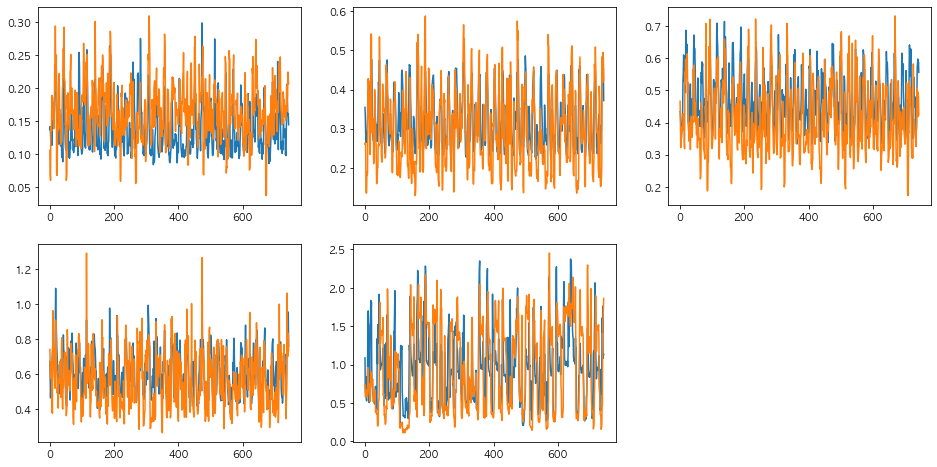

In [281]:
clusters_1 = _kmeans_1.clusters_
clusters_2 = _kmeans_2.clusters_

plt.figure(figsize=(16,8))

for idx, cluster_1 in enumerate(clusters_1):
    ax = plt.subplot(2,3, idx + 1)
    
    cluster_2 = clusters_2[idx]
    
    ax.plot(cluster_1)
    ax.plot(cluster_2)
    

plt.show()